## Globale Entwicklungen der Suizidraten: Ein datenbasierter Vergleich von 2000 bis 2021

---

### Autorinnen:
Giada De Luca, Priscilla Baccaro, Ana Lucia Gomes Carvalho  


### Kontakt:
delucgia@students.zhaw.ch, baccapri@students.zhaw.ch, gomesana@students.zhaw.ch  

### Fragestellung:
- Wie haben sich die Suizidraten weltweit zwischen 2000 und 2021 entwickelt, welche strukturellen Muster lassen sich in der zeitlichen Dynamik und der Verteilung der Länderwerte erkennen, und inwiefern führen diese Entwicklungen zu Veränderungen der relativen Länderpositionen im globalen Vergleich?
### Datenquelle:
- https://ourworldindata.org/suicide

---

### Einleitung

Die globale Suizidalität stellt ein vielschichtiges und gesellschaftlich hochrelevantes Gesundheitsproblem dar, das in nahezu allen Weltregionen zu erheblichen individuellen, familiären und volkswirtschaftlichen Belastungen führt. Die Analyse zeitlicher und internationaler Unterschiede ist daher wesentlich, um Risikofaktoren zu identifizieren, Präventionsstrategien zu verbessern und den Einfluss sozialer, politischer sowie kultureller Entwicklungen besser zu verstehen.

Diese Untersuchung basiert auf den Suizidraten aller weltweit verfügbaren Länder im Zeitraum von 2000 bis 2021. Altersstandardisierung ist dabei entscheidend, um Verzerrungen durch unterschiedliche Bevölkerungsstrukturen zu verhindern und länderübergreifende Vergleiche zu ermöglichen. Durch die Kombination verschiedener Auswertungsmethoden — Trendanalysen, Verteilungsvergleiche, Extremwertbetrachtungen, Länderrankings und Heatmaps — entsteht ein umfassendes Bild der globalen Suizidentwicklung.

Die Analyse folgt der übergeordneten Fragestellung:

**Wie haben sich die Suizidraten weltweit zwischen 2000 und 2021 entwickelt, welche strukturellen Muster lassen sich in der zeitlichen Dynamik und der Verteilung der Länderwerte erkennen, und inwiefern führen diese Entwicklungen zu Veränderungen der relativen Länderpositionen im globalen Vergleich?**

Sie ermöglicht damit eine differenzierte Betrachtung zentraler Aspekte:

- **globale zeitliche Entwicklungen** (Ab- oder Zunahmen im weltweiten Durchschnitt),
- **Ungleichheiten zwischen Ländern** und deren Veränderung über die Zeit,
- **Stabilität oder Dynamik im Ranking einzelner Staaten**, also der Frage, ob bestimmte Länder dauerhaft hohe oder niedrige Belastungen aufweisen,
- **Extremwerte und deren Ursachen**, etwa sehr niedrige Raten aufgrund kultureller Normen oder sehr hohe Raten in Ländern mit multiplen Belastungsfaktoren.

Durch diese multiperspektivische Herangehensweise wird ersichtlich, wie komplex die Entwicklung von Suizidraten ist und wie stark sie von gesellschaftlichen, ökonomischen und politischen Kontextbedingungen abhängig bleibt. Die Analyse liefert damit nicht nur ein deskriptives Bild, sondern unterstützt auch ein besseres Verständnis der zugrunde liegenden Mechanismen und potenziellen Ansatzpunkte für Prävention und Gesundheitspolitik.

**Die Arbeit ist folgendermassen gegliedert:**
- 1. Daten bechaffen und laden
- 2. Vorbereitung und Bereinigung der Daten
- 3. Statistik der Rohdaten
    - 3.1 Datenformat
    - 3.2 Art der Variabeln (kontinuierlich vs. diskret)
    - 3.3 Anzahl der Datenpunkte und Klassen
    - 3.4 Fehlende Daten
    - 3.5 Nullwerte in der Zielvariable
    - 3.6 Zusammenfassende Bewertung der Rohdaten
- 4. Analyse
    - 4.1 Globaler Trend der Suizidraten(2000-2021)
    - 4.2 Globaler Trend der Suizidraten: Mittelwert und Median (2000-2021)
    - 4.3 Entwicklung der Streuung der Suizidraten über die Zeit
    - 4.4 Entwicklung von Extremwerten der Suizidraten (Minimum–Maximum)
    - 4.5 Vergleich der Verteilungen der Suizidraten zu ausgewählten Zeitpunkten
    - 4.6 Extremwerte im Ländervergleich: Top-10 und Bottom-10 im Jahr 2020
    - 4.7 Zeitliche Muster der Suizidraten in hoch belasteten Ländern
    - 4.8 Ländervergleich der Suizidraten im zeitlichen Verlauf
- 5. Wissenschaftliche Diskussion und Schlussfolgerung

---

### 1. Daten beschaffen und laden

In [1]:
!pip install pandas seaborn matplotlib

In [14]:
# laden von Bibliotheken -> Pandas, Seaborn, Matplotlib

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

## 2. Vorbereitung und Bereinigung der Daten
- Die Daten liegen im Long-Format vor, da jede Zeile eine Beobachtung eines Landes in einem bestimmten Jahr beschreibt.    
- Wir arbeiten primär im Long-Format, da es sich für Zeitreihen, Gruppierungen und statistische Analysen eignet. Für spezielle Visualisierungen wie Heatmaps wandlen wir die Daten temporär ins Wide-Format um. 
- Der Datensatz enthält kategoriale, diskrete zeitliche und kontinuierliche numerische Variablen. Technisch ausgedrückt wären das "Integer", "Float" und "Object".

In [13]:
data = pd.read_csv("death-rate-from-suicides-gho.csv")

# Spalte umbenennen, damit sie einfacher zu verwenden ist
data.rename(columns={'Age-standardized death rate from self-harm among both sexes': 'SuicideRate'}, inplace=True)

data


,Entity,Code,Year,SuicideRate
0,Afghanistan,AFG,2000,7.197108
1,Afghanistan,AFG,2001,7.281792
2,Afghanistan,AFG,2002,7.123594
3,Afghanistan,AFG,2003,7.053904
4,Afghanistan,AFG,2004,7.034545
...,...,...,...,...
4417,Zimbabwe,ZWE,2017,23.662240
4418,Zimbabwe,ZWE,2018,24.729877
4419,Zimbabwe,ZWE,2019,23.761830
4420,Zimbabwe,ZWE,2020,23.614447


In [4]:
print(data.dtypes)
print()

data_pivot = data.pivot(index='Entity', columns='Year', values='SuicideRate')
data_pivot



Entity          object
Year             int64
SuicideRate    float64
dtype: object



Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.197108,7.281792,7.123594,7.053904,7.034545,6.910225,6.608689,6.476178,6.302887,5.891947,...,5.774172,5.685669,5.535404,5.319865,5.322144,5.470633,5.424701,5.367804,5.324849,5.320608
Africa,10.093091,10.013195,10.017222,10.010037,9.915320,9.732854,9.715343,9.649155,9.645603,9.606206,...,9.522184,9.436768,9.414608,9.401263,9.310595,9.228361,9.374145,9.355742,9.379318,9.580948
Albania,5.104753,4.418037,4.479788,4.595087,4.502845,6.913495,6.862893,6.947456,6.954976,6.820407,...,4.092385,4.056547,3.798754,3.580979,3.450706,3.292069,3.141507,3.026028,2.507422,2.143994
Algeria,4.140792,3.921089,3.803862,3.521953,3.327965,3.218484,3.081167,2.945067,2.815762,2.683964,...,2.364761,2.327027,2.295923,2.225488,2.135747,2.136896,2.172493,2.170682,1.848795,2.320863
Andorra,9.685721,10.776894,10.718483,9.985846,11.859435,10.398196,10.702955,10.374284,10.033582,9.822695,...,8.119903,9.338711,9.277414,9.163852,9.708513,8.330241,7.659383,8.645201,12.004117,5.742578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,6.927767,6.923227,6.920114,6.869646,6.917716,6.948654,6.978310,7.130195,7.290453,7.399363,...,7.559208,7.585942,7.669756,7.756240,7.663852,7.489950,7.436153,7.434940,6.712402,7.072024
World,13.633704,13.190458,13.043129,12.899120,12.697592,12.362221,11.826673,11.508915,11.309613,11.114435,...,10.404048,10.184580,9.982348,9.746957,9.586628,9.525665,9.418068,9.247089,8.824477,8.847767
Yemen,7.861649,7.734527,7.558073,7.247392,6.952352,6.898687,6.559412,6.853923,6.770277,6.548499,...,5.916806,5.821491,5.783601,5.615148,5.758510,5.637037,5.499696,5.282959,4.943927,5.210097



---
## 3. Statistik der Rohdaten

In diesem Abschnitt wird der Datensatz deskriptiv analysiert, um Struktur, Datentypen, Umfang sowie die Verteilung der Variablen zu untersuchen. Die Analyse erfolgt im Long-Format, wobei jede Zeile eine eindeutige Beobachtung eines Landes in einem bestimmten Jahr darstellt.

---

### 3.1 Datenformat

Der Datensatz liegt im **Long-Format** vor. Jede Beobachtung entspricht einer eindeutigen Kombination aus `Entity` (Land/Region) und `Year`. Dieses Format eignet sich besonders für Zeitreihenanalysen, Gruppierungen sowie statistische Auswertungen über Länder und Jahre hinweg.

---

### 3.2 Art der Variablen (kontinuierlich vs. diskret)

Die Zielvariable der Analyse, die altersstandardisierte Suizidrate, ist **theoretisch eine kontinuierliche Variable**, da sie reelle Zahlen annehmen kann. Im vorliegenden Datensatz liegt sie jedoch als **diskret beobachtete Variable** vor, da die Werte ausschließlich für **jährliche Zeitpunkte** erhoben wurden.

Die Variable `Year` ist **diskret und ordinal**, da sie ganzzahlige Jahreswerte im Zeitraum von 2000 bis 2021 umfasst und eine natürliche zeitliche Ordnung besitzt. Insgesamt sind **22 einzigartige Jahre** im Datensatz enthalten.

Die Variable `Entity` ist **kategorial (nominal)** und beschreibt Länder oder aggregierte Regionen. Jedes Land tritt mehrfach im Datensatz auf, jeweils für unterschiedliche Jahre.

Die Variable `Code` ist ebenfalls **kategorial**, stellt jedoch ein standardisiertes Länderkürzel dar und ist nicht für alle Einträge vorhanden.

---

### 3.3 Anzahl der Datenpunkte und Klassen

Der Datensatz umfasst insgesamt **4’422 Datenpunkte**, wobei jeder Datenpunkt einer Beobachtung eines Landes in einem bestimmten Jahr entspricht.

- `Entity`: 4’422 Einträge  
- `Year`: 4’422 Einträge  
- altersstandardisierte Suizidrate: 4’422 Einträge  
- `Code`: 4’290 Einträge  

Die diskrete Zeitvariable `Year` weist **22 einzigartige Klassen** auf. Pro Jahr sind mehrere Länder vertreten, sodass jede Klasse aus einer Vielzahl von Datenpunkten besteht.

In [11]:
# 3.3 Anzahl der einzigartigen Klassen (Länder)
unique_countries = data['Entity'].nunique()
print(f"Anzahl einzigartiger Länder (Klassen): {unique_countries}")

# 3.3 Anzahl der Datenpunkte pro Land (Klasse)
# Zeigt, wie viele Einträge es für Deutschland, Afghanistan, etc. gibt
print("\nAnzahl Datenpunkte pro Land:")
print(data['Entity'].value_counts())

# 3.3 Anzahl der einzigartigen Klassen (Jahre)
unique_years = data['Year'].nunique()
print(f"\nAnzahl einzigartiger Jahre (Klassen): {unique_years}")

# 3.3 Anzahl der Datenpunkte pro Jahr (Klasse)
# Zeigt, wie viele Beobachtungen es pro Jahr gibt
print("\nAnzahl Datenpunkte pro Jahr:")
print(data['Year'].value_counts())

Anzahl einzigartiger Länder (Klassen): 201

Anzahl Datenpunkte pro Land:
Entity
Afghanistan    22
Palau          22
Niger          22
Nigeria        22
Niue           22
               ..
Ghana          22
Greece         22
Grenada        22
Guatemala      22
Zimbabwe       22
Name: count, Length: 201, dtype: int64

Anzahl einzigartiger Jahre (Klassen): 22

Anzahl Datenpunkte pro Jahr:
Year
2000    201
2001    201
2020    201
2019    201
2018    201
2017    201
2016    201
2015    201
2014    201
2013    201
2012    201
2011    201
2010    201
2009    201
2008    201
2007    201
2006    201
2005    201
2004    201
2003    201
2002    201
2021    201
Name: count, dtype: int64



---
### 3.4 Fehlende Daten

In der Spalte `Code` fehlen **132 Werte**. Diese fehlenden Einträge lassen sich dadurch erklären, dass bestimmte Beobachtungen keine einzelnen Länder darstellen, sondern aggregierte Einheiten wie z. B. *World* oder Kontinente. Für diese Einheiten existiert kein standardisiertes Länderkürzel, weshalb der `Code` leer bleibt.

Für die Zielvariable der Analyse (Suizidrate) liegen keine fehlenden Werte vor, sodass alle statistischen Auswertungen auf vollständigen Beobachtungen basieren.

Aufgrund fehlender Werte in der Variablen `Code` sowie deren begrenzter Relevanz für die Fragestellung wurde diese Variable in der Datenbereinigung für die weiteren Analyseprozess ausgeschlossen.

In [ ]:
# 3.4 Fehlende Werte in der Spalte "Code"
missing_code = data["Code"].isna().sum()
print(f"Anzahl fehlender Werte in der Spalte 'Code': {missing_code}")

# Einträge ohne Ländercode anzeigen
print("\nBeispiele für Einträge ohne Code (Entity & Jahr):")
print(data[data["Code"].isna()][["Entity", "Year"]])

# Anteil fehlender Codes in Prozent
percentage_missing_code = (missing_code / len(data)) * 100
print(f"\nAnteil fehlender Codes: {percentage_missing_code:.2f}%")

# Entfernen der Spalte 'Code', da sie für die Analyse nicht benötigt wird
data = data.drop(columns=["Code"])


Anzahl fehlender Werte in der Spalte 'Code': 132

Beispiele für Einträge ohne Code (Entity & Jahr):
             Entity  Year
22           Africa  2000
23           Africa  2001
24           Africa  2002
25           Africa  2003
26           Africa  2004
...             ...   ...
3691  South America  2017
3692  South America  2018
3693  South America  2019
3694  South America  2020
3695  South America  2021

[132 rows x 2 columns]

Anteil fehlender Codes: 2.99%



---
### 3.5 Nullwerte in der Zielvariable

Im Datensatz treten vereinzelt Suizidraten mit dem Wert **0** auf. Diese Werte sind **nicht als tatsächliche Abwesenheit von Suiziden** zu interpretieren. Sie entstehen vielmehr durch statistische Schätzverfahren, Rundung sehr kleiner Werte oder durch unvollständige Datenerfassung in bestimmten Ländern.

Insbesondere in Ländern mit eingeschränkten Meldesystemen, starker gesellschaftlicher Tabuisierung oder rechtlichen Einschränkungen kann es zu einer Untererfassung von Suiziden kommen. Die Nullwerte werden in der Analyse daher beibehalten, jedoch bei der Interpretation der Ergebnisse – insbesondere im unteren Wertebereich – kritisch berücksichtigt.

In [10]:
# 3.5 Länder und Jahre mit Suizidrate = 0
zeros = data[data["SuicideRate"] == 0]
print("\nNullwerte in der Zielvariable:")
print(zeros[["Entity", "Year", "SuicideRate"]])
print(f"\nAnzahl Datenpunkte mit Suizidrate = 0: {len(zeros)}")


Nullwerte in der Zielvariable:
                                Entity  Year  SuicideRate
141                Antigua and Barbuda  2009          0.0
142                Antigua and Barbuda  2010          0.0
143                Antigua and Barbuda  2011          0.0
144                Antigua and Barbuda  2012          0.0
145                Antigua and Barbuda  2013          0.0
149                Antigua and Barbuda  2017          0.0
150                Antigua and Barbuda  2018          0.0
151                Antigua and Barbuda  2019          0.0
3361  Saint Vincent and the Grenadines  2017          0.0
3362  Saint Vincent and the Grenadines  2018          0.0

Anzahl Datenpunkte mit Suizidrate = 0: 10



---

### 3.6 Zusammenfassende Bewertung der Rohdaten

Der Datensatz weist eine klare Struktur im Long-Format auf und enthält überwiegend vollständige und konsistente Daten. Die Kombination aus kategorialen, diskreten zeitlichen und metrisch kontinuierlichen Variablen ermöglicht vielfältige statistische Analysen. Einschränkungen ergeben sich hauptsächlich durch aggregierte Einheiten ohne Ländercode sowie durch mögliche Untererfassung im unteren Wertebereich der Suizidraten.

---

## 4. Analyse

In diesem Abschnitt wird die Fragestellung anhand einer systematischen Datenanalyse untersucht. Ziel ist es, die zeitliche Entwicklung der altersstandardisierten Suizidraten sowie internationale Unterschiede und Verteilungsstrukturen quantitativ zu erfassen und zu interpretieren. 

Hierzu werden zunächst geeignete statistische Kennzahlen berechnet und anschließend durch verschiedene Visualisierungen dargestellt. Die Auswahl der Diagrammtypen orientiert sich dabei an der jeweiligen Fragestellung, um sowohl zeitliche Trends als auch Unterschiede zwischen Ländern und Veränderungen in der Verteilung sichtbar zu machen. 

Die beobachteten Muster werden beschrieben und im Anschluss interpretiert, wobei mögliche Erklärungen und Hypothesen zu den Ergebnissen formuliert werden. Abschließend erfolgt eine Einordnung der Resultate im Kontext bestehender wissenschaftlicher Erkenntnisse, um potenzielle Zusammenhänge zwischen Suizidraten und gesellschaftlichen, wirtschaftlichen sowie gesundheitspolitischen Faktoren aufzuzeigen.

**Gliederung:**
- 4.1 Globaler Trend der Suizidraten(2000-2021)
- 4.2 Globaler Trend der Suizidraten: Mittelwert und Median (2000-2021)
- 4.3 Entwicklung der Streuung der Suizidraten über die Zeit
- 4.4 Entwicklung von Extremwerten der Suizidraten (Minimum–Maximum)
- 4.5 Vergleich der Verteilungen der Suizidraten zu ausgewählten Zeitpunkten
- 4.6 Extremwerte im Ländervergleich: Top-10 und Bottom-10 im Jahr 2020
- 4.7 Zeitliche Muster der Suizidraten in hoch belasteten Ländern
- 4.8 Ländervergleich der Suizidraten im zeitlichen Verlauf

---


### 4.1 Globaler Trend der Suizidraten

Zur Einordnung der zeitlichen Entwicklung wird zunächst der globale Trend der Suizidraten im Zeitraum von 2000 bis 2021 analysiert. Durch die Aggregation der Länderwerte pro Jahr entsteht eine zusammenfassende Perspektive, die grundlegende Veränderungen auf globaler Ebene sichtbar macht.

Der globale Durchschnitt wurde gewählt, um langfristige Entwicklungen und allgemeine Tendenzen unabhängig von einzelnen Ländern darzustellen. Diese Darstellung dient als Ausgangspunkt für die weitere Analyse und ermöglicht es, länder- und jahresspezifische Abweichungen und Unterschiede in den nachfolgenden Auswertungen gezielt einzuordnen.


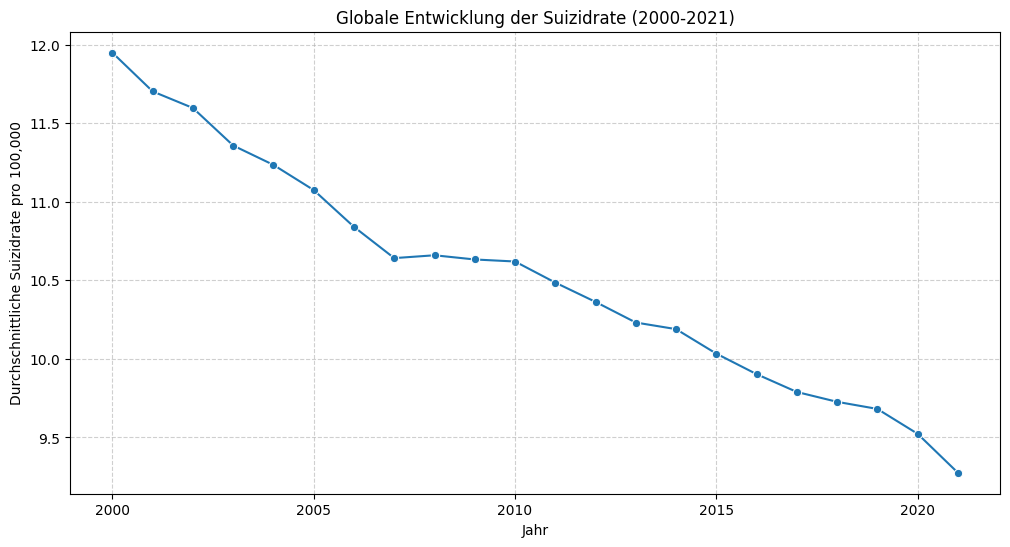

In [ ]:
# 1. Durchschnittliche weltweite Suizidrate pro Jahr berechnen
# (Gruppierung nach Jahr und Mittelwertbildung der SuicideRate)
global_trend = data.groupby('Year')['SuicideRate'].mean().reset_index()

# 2. Den globalen Trend als Liniendiagramm visualisieren
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_trend, x='Year', y='SuicideRate', marker='o')

# Achsen und Titel beschriften
plt.title('Globale Entwicklung der Suizidrate (2000-2021)')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittliche Suizidrate pro 100,000')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



### Interpretation: Globaler Trend der Suizidraten (2000–2021)

Das Liniendiagramm stellt die zeitliche Entwicklung der **durchschnittlichen altersstandardisierten Suizidrate auf globaler Ebene** im Zeitraum von 2000 bis 2021 dar.

- X-Achse: Jahre  
- Y-Achse: durchschnittliche Suizidrate über alle Länder  

**Was man erkennen kann:**

- Der Verlauf zeigt eine **übergeordnete langfristige Entwicklung**, die unabhängig von einzelnen Ländern interpretiert werden kann.
- Die Darstellung macht sichtbar, dass die globale Entwicklung **nicht strikt linear** verläuft, sondern durch Phasen relativer Stabilität oder stärkerer Veränderung gekennzeichnet ist.
- Der Plot dient als **Referenzrahmen**, um nachfolgende länderspezifische Analysen einzuordnen und Abweichungen vom globalen Muster sichtbar zu machen.

Der globale Durchschnitt ermöglicht damit eine **kompakte Zusammenfassung der weltweiten Entwicklung**, stellt jedoch keine Aussage über die Verteilung oder Ungleichheit zwischen einzelnen Ländern dar und wird daher durch weitere Analysen ergänzt.

---

### 4.2 Globaler Trend der Suizidraten: Mittelwert und Median

Zur grundlegenden Einordnung der zeitlichen Entwicklung der Suizidraten wird zunächst der globale Trend im Zeitraum von 2000 bis 2021 betrachtet. Hierzu werden für jedes Jahr sowohl der **arithmetische Mittelwert** als auch der **Median** der Suizidraten über alle Länder hinweg berechnet.

Die parallele Darstellung von Mittelwert und Median ermöglicht eine differenzierte Betrachtung der globalen Entwicklung. Während der Mittelwert sensibel auf Extremwerte reagiert, gibt der Median Auskunft über die „typische“ Suizidrate eines Landes. Der Vergleich beider Kennzahlen erlaubt es daher, zu beurteilen, inwieweit der globale Trend durch Ausreißer einzelner Länder beeinflusst wird oder eine breit angelegte Entwicklung widerspiegelt.


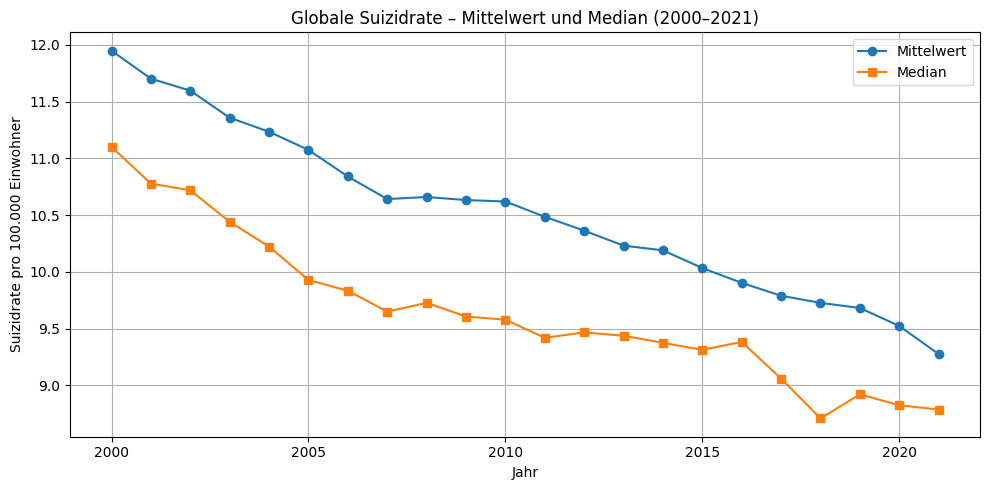

In [7]:

# Wir nehmen einfach die LETZTE Spalte als Suizidrate
rate_col = data.columns[-1]
"""print("\nVerwendete Rate-Spalte:", rate_col)"""

# Nur Jahre 2000–2021
data = data[(data["Year"] >= 2000) & (data["Year"] <= 2021)]

# 1. GLOBALER TREND: MITTEL & MEDIAN PRO JAHR

trend = (
    data.groupby("Year")[rate_col]
    .agg(["mean", "median"])
    .reset_index()
)


plt.figure(figsize=(10, 5))
plt.plot(trend["Year"], trend["mean"], marker="o", label="Mittelwert")
plt.plot(trend["Year"], trend["median"], marker="s", label="Median")
plt.title("Globale Suizidrate – Mittelwert und Median (2000–2021)")
plt.xlabel("Jahr")
plt.ylabel("Suizidrate pro 100.000 Einwohner")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Interpretation und Ergebnis: Globaler Trend der Suizidraten – Mittelwert und Median (2000–2021)

**Was zeigt der Plot?**  
Der Plot von Mittelwert und Median der Suizidraten pro Jahr zeigt über den Zeitraum von 2000 bis 2021 einen insgesamt **abnehmenden Verlauf**. Beide Kennzahlen sinken langfristig, unterscheiden sich jedoch in ihrem zeitlichen Verlauf. Während der Mittelwert relativ gleichmäßig abnimmt, weist der Median teilweise **stärkere kurzfristige Schwankungen** auf. Dies deutet darauf hin, dass sich insbesondere die Suizidraten im mittleren Bereich der Länderverteilung über die Zeit verändern, während sich extreme hohe und niedrige Werte im Mittel teilweise ausgleichen.

**Warum könnte das so sein?**  
- Seit den frühen 2000er-Jahren wurden in vielen Ländern systematische **Suizidpräventionsprogramme** etabliert, darunter Kriseninterventionen, Aufklärungskampagnen und schulische Präventionsangebote.  
- Die **Versorgung psychischer Erkrankungen** wurde in zahlreichen Staaten ausgebaut, etwa durch verbesserten Zugang zu Psychotherapie, medikamentöser Behandlung und gemeindenahen Versorgungsstrukturen.  
- In verschiedenen Regionen wurden gezielt **Zugangsbarrieren zu hoch letalen Suizidmethoden** geschaffen, was nachweislich mit sinkenden Suizidraten einhergeht.  
- Zudem hat sich die gesellschaftliche Wahrnehmung von Suizid zunehmend als **öffentliches Gesundheitsproblem** etabliert, wodurch politische und institutionelle Präventionsmaßnahmen verstärkt priorisiert wurden.  
- Ein Teil des Trends kann auch durch **Veränderungen in der Datenerfassung** erklärt werden; der langfristige und konsistente Rückgang über mehr als zwei Jahrzehnte spricht jedoch primär für **reale Verbesserungen** im Bereich der psychischen Gesundheit und Suizidprävention.

---


### 4.3 Entwicklung der Streuung der Suizidraten über die Zeit

Neben der Analyse von Mittelwerten und Extremwerten wird im folgenden Abschnitt untersucht, wie sich die **Streuung der Suizidraten zwischen Ländern** im Zeitraum von 2000 bis 2021 entwickelt hat. Ziel ist es zu analysieren, ob sich die Länderwerte im Zeitverlauf einander annähern oder weiterhin stark auseinanderliegen.

Hierfür werden zwei komplementäre Streuungsmaße verwendet: die **Standardabweichung**, die empfindlich auf Extremwerte reagiert, und der **Interquartilsabstand (IQR)**, der die Streuung im mittleren Bereich der Verteilung beschreibt. Die kombinierte Betrachtung ermöglicht eine differenzierte Einschätzung, ob Veränderungen der internationalen Unterschiede primär durch Extremwerte oder durch eine allgemeine Konvergenz der Länderwerte bedingt sind.


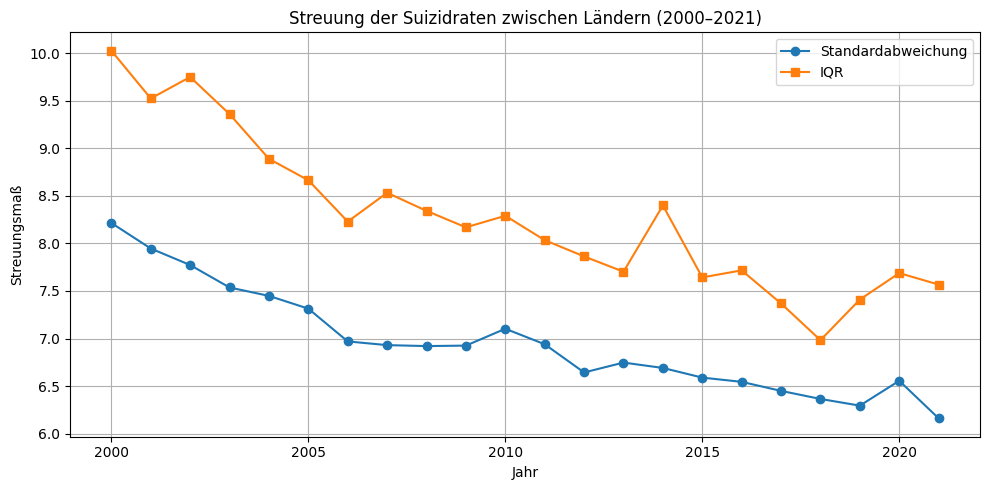

In [10]:
# 6. STREUUNG ÜBER DIE ZEIT (STD & IQR)

g = data.groupby("Year")[rate_col]
years = g.mean().index

std_vals = g.std()
iqr_vals = g.quantile(0.75) - g.quantile(0.25)

dispersion = pd.DataFrame({
    "Year": years,
    "StdAbweichung": std_vals.values,
    "IQR": iqr_vals.values
})

plt.figure(figsize=(10, 5))
plt.plot(dispersion["Year"], dispersion["StdAbweichung"], marker="o", label="Standardabweichung")
plt.plot(dispersion["Year"], dispersion["IQR"], marker="s", label="IQR")
plt.title("Streuung der Suizidraten zwischen Ländern (2000–2021)")
plt.xlabel("Jahr")
plt.ylabel("Streuungsmaß")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Vertiefte Interpretation: Streuung der Suizidraten zwischen Ländern (2000–2021)

Der dargestellte Plot untersucht nicht die Entwicklung der Suizidraten selbst, sondern die **Ungleichheit zwischen Ländern innerhalb eines Jahres**. Er beantwortet somit die Frage, wie stark sich Länder in ihren Suizidraten voneinander unterscheiden und wie sich diese Unterschiede im Zeitverlauf verändern.

Zur Beschreibung der Streuung werden zwei komplementäre Maße verwendet:

- Die **Standardabweichung** misst die gesamte Streuung der Suizidraten zwischen Ländern und ist besonders empfindlich gegenüber extrem hohen oder niedrigen Werten. Ein Rückgang der Standardabweichung deutet darauf hin, dass Länder mit sehr hohen Suizidraten seltener werden oder ihre Raten stärker senken, während ein Anstieg auf zunehmende Ungleichheiten durch einzelne Extremfälle hinweist.

- Der **Interquartilsabstand (IQR)** misst die Unterschiede zwischen den Ländern im „Mittelfeld“ der Verteilung. Ein sinkender IQR weist darauf hin, dass sich die Mehrheit der Länder in ihren Suizidraten zunehmend angleicht, während ein steigender IQR auf wachsende Unterschiede im typischen Ländervergleich hindeutet.


Der langfristige Rückgang beider Kurven zeigt, dass sich die Suizidraten der Länder im Zeitraum von 2000 bis 2021 insgesamt **einander annähern**. Insbesondere die abnehmende Standardabweichung weist darauf hin, dass Länder mit sehr hohen Suizidraten im Zeitverlauf seltener werden oder ihre Raten deutlich senken konnten. Der Rückgang des IQRs deutet zusätzlich darauf hin, dass sich auch die Mehrheit der Länder im mittleren Bereich der Verteilung annähert.

Gleichzeitig sind zeitweise **Schwankungen**, vor allem im IQR, sichtbar. Diese verdeutlichen, dass der Angleichungsprozess nicht linear verläuft und durch regionale oder zeitlich begrenzte Einflüsse – etwa wirtschaftliche Krisen, politische Instabilität oder unterschiedliche Umsetzungsgrade von Präventionsmaßnahmen – unterbrochen werden kann.

Insgesamt ergänzt die Streuungsanalyse die globale Trendanalyse, indem sie zeigt, dass der weltweite Rückgang der Suizidraten nicht ausschließlich auf einzelne Extremfälle zurückzuführen ist, sondern auf eine breitere Annäherung der Länderwerte. Dennoch bleiben **persistente internationale Unterschiede** bestehen, was auf weiterhin unterschiedliche gesellschaftliche, ökonomische und gesundheitspolitische Rahmenbedingungen hinweist.

---

### 4.4 Entwicklung von Extremwerten der Suizidraten (Minimum–Maximum)

Zur weiteren Einordnung der globalen Entwicklung werden im folgenden Diagramm die **jährlichen Minimal- und Maximalwerte** der altersstandardisierten Suizidraten im Zeitraum von 2000 bis 2021 dargestellt. Diese Darstellung ergänzt den globalen Durchschnitt, indem sie die **Spannweite zwischen den am stärksten und am geringsten belasteten Ländern** sichtbar macht.

Die Analyse von Extremwerten wurde gewählt, um zu untersuchen, ob sich neben dem globalen Trend auch die **internationalen Unterschiede im Extrembereich** verändert haben oder ob bestimmte Länder dauerhaft sehr hohe beziehungsweise sehr niedrige Suizidraten aufweisen.


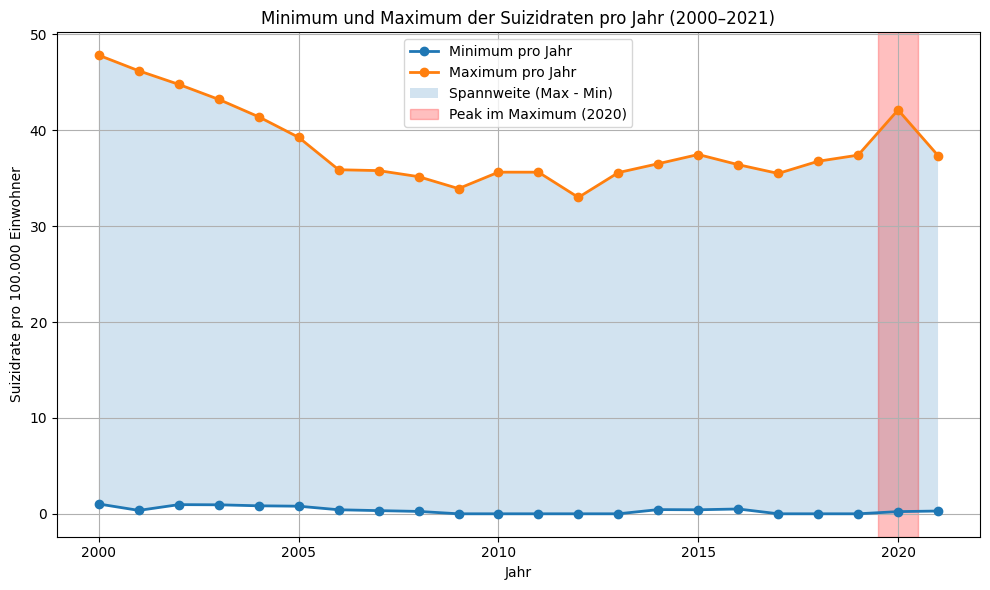

In [14]:
# Minimum und Maximum pro Jahr berechnen
min_max = data.groupby("Year")["SuicideRate"].agg(["min", "max"]).reset_index()

plt.figure(figsize=(10, 6))

# Minimum-Linie
plt.plot(
    min_max["Year"],
    min_max["min"],
    marker="o",
    label="Minimum pro Jahr",
    linewidth=2
)

# Maximum-Linie
plt.plot(
    min_max["Year"],
    min_max["max"],
    marker="o",
    label="Maximum pro Jahr",
    linewidth=2
)

# Spannweite
plt.fill_between(
    min_max["Year"],
    min_max["min"],
    min_max["max"],
    alpha=0.2,
    label="Spannweite (Max - Min)"
)

#  Hervorhebung des Peak-Jahres 2020
plt.axvspan(
    2019.5, 2020.5,
    color="red",
    alpha=0.25,
    label="Peak im Maximum (2020)"
)

plt.title("Minimum und Maximum der Suizidraten pro Jahr (2000–2021)")
plt.xlabel("Jahr")
plt.ylabel("Suizidrate pro 100.000 Einwohner")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




### Interpretation: Minimum und Maximum der Suizidraten pro Jahr (2000–2021)

Das Diagramm stellt für jedes Jahr im Zeitraum von 2000 bis 2021 die **niedrigste (Minimum)** und **höchste (Maximum)** Suizidrate dar, die in einem Land beobachtet wurde.  
Die schattierte Fläche zwischen beiden Linien repräsentiert die **Spannweite (Range)** und dient als Indikator für die **Ungleichheit zwischen Ländern** innerhalb eines Jahres.

#### Entwicklung der Minimalwerte
Die **Minimum-Linie** bleibt über den gesamten Beobachtungszeitraum hinweg sehr niedrig und weist nur geringe Schwankungen auf. Dies kann teilweise auf reale Schutzfaktoren wie starke soziale Netzwerke, kulturelle oder religiöse Normen sowie eingeschränkte Verfügbarkeit hochletaler Suizidmethoden zurückgeführt werden.  
Gleichzeitig ist zu berücksichtigen, dass besonders niedrige Werte auch durch **Untererfassung** entstehen können, etwa in Ländern, in denen Suizid tabuisiert, religiös verboten oder statistisch unzureichend erfasst wird. Die Minimalwerte spiegeln daher nicht ausschließlich die tatsächliche Belastung wider, sondern auch Unterschiede in der Datenqualität.

#### Entwicklung der Maximalwerte und Peak im Jahr 2020
Die **Maximum-Linie** liegt deutlich über den Minimalwerten und zeigt langfristig einen insgesamt rückläufigen Trend. Dies deutet darauf hin, dass Länder mit traditionell hohen Suizidraten im Zeitverlauf Fortschritte erzielen konnten, beispielsweise durch verbesserte Präventionsprogramme, Ausbau psychiatrischer Versorgung oder regulatorische Maßnahmen zur Einschränkung hochletaler Methoden.

Auffällig ist jedoch ein **erneuter Anstieg des Maximums im Jahr 2020**, der sich deutlich vom vorherigen Trend abhebt. Dieser Peak kann plausibel im Zusammenhang mit den **globalen Auswirkungen der COVID-19-Pandemie** interpretiert werden. In einzelnen Ländern führten soziale Isolation, wirtschaftliche Unsicherheit, Arbeitslosigkeit sowie eingeschränkter Zugang zu psychosozialer Versorgung zu einer erhöhten psychischen Belastung, die sich in stark erhöhten Suizidraten widerspiegeln konnte. Der Peak verdeutlicht, dass externe Krisen bestehende Vulnerabilitäten kurzfristig verstärken können.

#### Entwicklung der Spannweite (Ungleichheit)
Die **Spannweite zwischen Minimum und Maximum** bleibt über den gesamten Zeitraum hinweg groß, auch wenn sie phasenweise abnimmt. Dies zeigt, dass globale Verbesserungen nicht gleichmäßig verteilt sind.  
Eine **abnehmende Spannweite** deutet auf eine Annäherung der Länderwerte hin (Konvergenz), während der temporäre Anstieg um 2020 darauf hindeutet, dass globale Krisen bestehende Ungleichheiten zwischen Ländern erneut verstärken können.

Insgesamt macht das Minimum-Maximum-Diagramm deutlich, dass zwar langfristige Fortschritte in der Suizidprävention erkennbar sind, die internationale Ungleichheit jedoch bestehen bleibt und in Krisenzeiten sogar zunimmt.


---


### 4.5 Vergleich der Verteilungen der Suizidraten zu ausgewählten Zeitpunkten

Zur Untersuchung der Veränderung der internationalen Verteilung der Suizidraten werden im folgenden Abschnitt Boxplots für die Jahre 2000, 2010 und 2020 dargestellt. Diese ausgewählten Zeitpunkte ermöglichen eine vergleichende Betrachtung zu Beginn, in der Mitte und gegen Ende des Beobachtungszeitraums.

Die Boxplots wurden gewählt, da sie nicht nur zentrale Tendenzen, sondern auch Streuung, Ausreißer und Unterschiede zwischen Ländern sichtbar machen und damit über reine Durchschnittswerte hinausgehen.


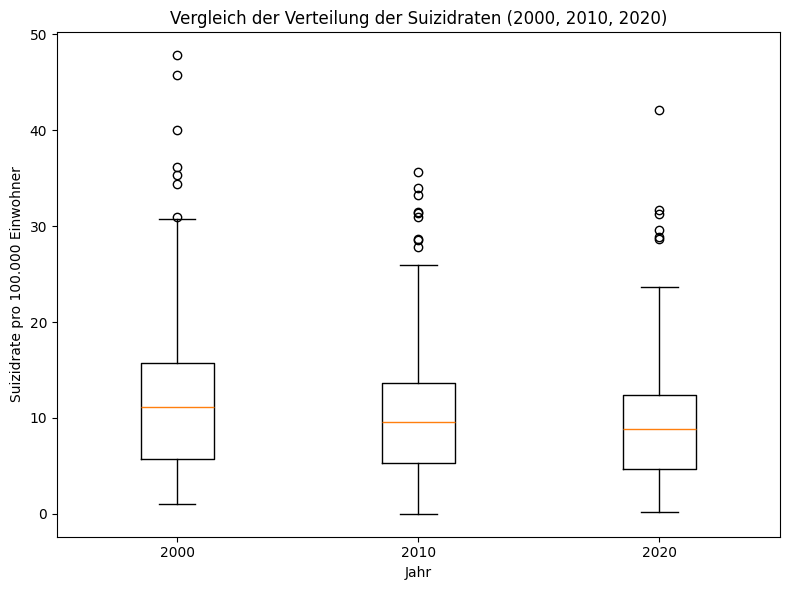

In [81]:
# 3. BOXPLOTS: 2000 / 2010 / 2020

years_box = [2000, 2010, 2020]
data_box = data[data["Year"].isin(years_box)]

box_data = [data_box[data_box["Year"] == y][rate_col] for y in years_box]

plt.figure(figsize=(8, 6))
plt.boxplot(box_data, tick_labels=years_box)
plt.title("Vergleich der Verteilung der Suizidraten (2000, 2010, 2020)")
plt.xlabel("Jahr")
plt.ylabel("Suizidrate pro 100.000 Einwohner")
plt.tight_layout()
plt.show()



---
### 4.6 Extremwerte im Ländervergleich: Top-10 und Bottom-10 im Jahr 2020

Zur vertieften Analyse der internationalen Unterschiede werden im folgenden Abschnitt die zehn Länder mit den höchsten sowie die zehn Länder mit den niedrigsten altersstandardisierten Suizidraten im Jahr 2020 betrachtet. Die Auswahl eines einzelnen Jahres ermöglicht eine querschnittliche Gegenüberstellung der Länderwerte ohne zeitliche Mehrfachzählungen.

Die Darstellung mittels Balkendiagrammen wurde gewählt, da sie Unterschiede im Extrembereich besonders anschaulich macht und den direkten Vergleich zwischen stark belasteten und gering belasteten Ländern erleichtert.


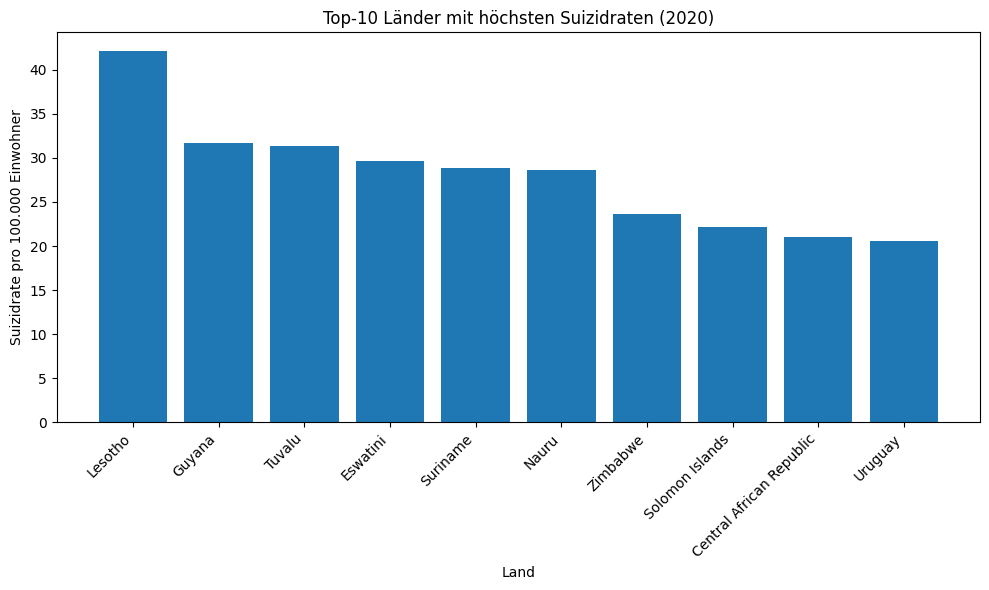

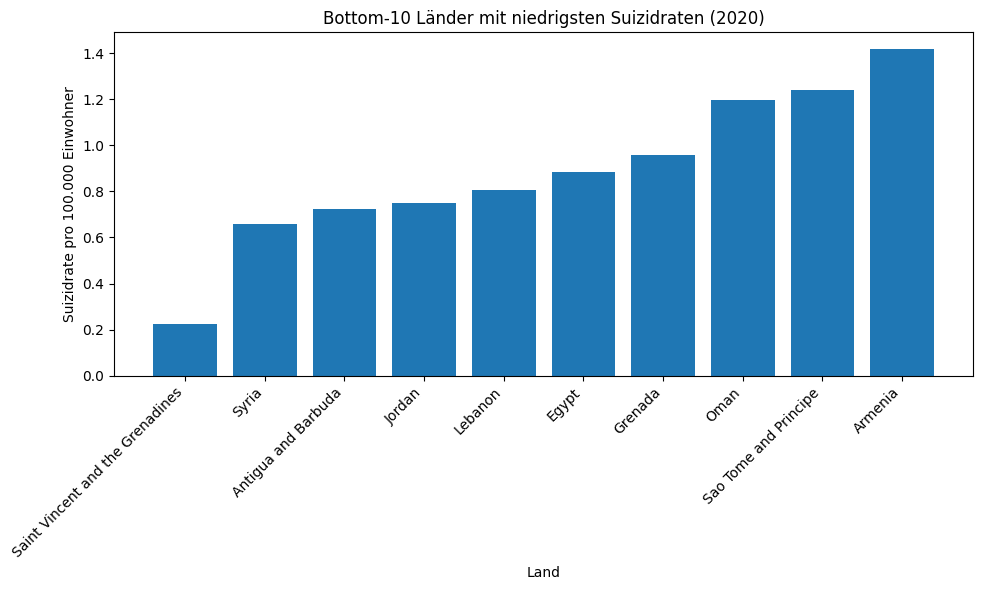

In [9]:
# 4. TOP-10 UND BOTTOM-10 LÄNDER 2020 (BARPLOTS)
year = 2020
data_2020 = data[data["Year"] == 2020]
top10 = data_2020.sort_values(rate_col, ascending=False).head(10)
bottom10 = data_2020.sort_values(rate_col, ascending=True).head(10)

# Top-10
plt.figure(figsize=(10, 6))
plt.bar(top10["Entity"], top10[rate_col])
plt.title(f"Top-10 Länder mit höchsten Suizidraten ({year})")
plt.xlabel("Land")
plt.ylabel("Suizidrate pro 100.000 Einwohner")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Bottom-10
plt.figure(figsize=(10, 6))
plt.bar(bottom10["Entity"], bottom10[rate_col])
plt.title(f"Bottom-10 Länder mit niedrigsten Suizidraten ({year})")
plt.xlabel("Land")
plt.ylabel("Suizidrate pro 100.000 Einwohner")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Interpretation: Top-10 Länder mit höchsten vs. niedrigsten Suizidraten (2020)


### Länder mit den höchsten Suizidraten 2020

**Was zeigt der Plot?**  
Der Balkenplot listet die Länder mit den **höchsten Suizidraten** im Jahr 2020. Diese Länder liegen deutlich über dem globalen Median.

**Warum könnte das so sein?**  
- Diese Länder tragen oft eine **hohe Last an Risikofaktoren**:  
  - wirtschaftliche Instabilität oder langandauernde Armut,  
  - hohe Raten von **Alkohol- oder Drogenmissbrauch**,  
  - langanhaltende Stressoren wie Konflikte, politische Umbrüche oder strukturelle Ungleichheit.  
- In einigen Ländern sind **Suizidmethoden mit hoher Letalität** relativ leicht verfügbar (z.B. bestimmte Pestizide, Schusswaffen), was die Sterberate pro Suizidversuch erhöht.  
- Gleichzeitig kann es sein, dass diese Länder **relativ gute Meldesysteme** haben – das bedeutet, die hohen Raten sind nicht nur reale Belastung, sondern auch dadurch sichtbar, dass Fälle nicht „verschwinden“, sondern korrekt als Suizid registriert werden.

### Länder mit den niedrigsten Suizidraten 2020

**Was zeigt der Plot?**  
Der Plot zeigt Länder mit sehr niedrigen offiziellen Suizidraten.

**Warum könnte das so sein?**  
Es gibt zwei grundverschiedene Erklärungsrichtungen, die beide eine Rolle spielen können:

1. **Tatsächlich niedrigere Suizidbelastung:**  
   - starke **familiäre und soziale Einbindung**,  
   - gesellschaftliche oder religiöse Normen, die **solidarische Unterstützung** fördern,  
   - geringere Verfügbarkeit hoch letaler Methoden,  
   - relativ stabile ökonomische Bedingungen.

2. **Untererfassung und Fehlklassifikation:**  
   - In manchen Ländern ist Suizid **tabuisiert oder sogar strafbar**, wodurch Angehörige und Behörden ein Interesse daran haben, Todesfälle eher als Unfall oder „unklare Ursache“ zu deklarieren.  
   - Schwache oder unvollständige **Meldesysteme für Todesursachen** führen dazu, dass viele Fälle nie korrekt im Register erscheinen.

In einer differenzierten Interpretation ist deshalb wichtig zu betonen, dass **niedrige gemessene Suizidraten nicht automatisch bedeuten, dass es auch real nur wenige Suizide gibt**.


---

### 4.7 Zeitliche Muster der Suizidraten in hoch belasteten Ländern

Zur vertieften Analyse internationaler Unterschiede wird im folgenden Abschnitt eine Heatmap für die 30 Länder mit den **durchschnittlich höchsten Suizidraten** über den gesamten Beobachtungszeitraum dargestellt. Die Auswahl dieser Länder basiert auf dem Mittelwert der Suizidraten und zielt darauf ab, strukturell stark belastete Staaten zu identifizieren, anstatt kurzfristige Extremwerte einzelner Jahre zu betrachten.

Die Heatmap wurde gewählt, da sie es ermöglicht, **zeitliche Muster und Stabilitäten** innerhalb einzelner Länder sowie **parallele Entwicklungen über Länder hinweg** visuell darzustellen. Dadurch können Phasen dauerhaft hoher Belastung, graduelle Verbesserungen oder abrupte Veränderungen im zeitlichen Verlauf identifiziert und im Kontext gesellschaftlicher und politischer Entwicklungen diskutiert werden.


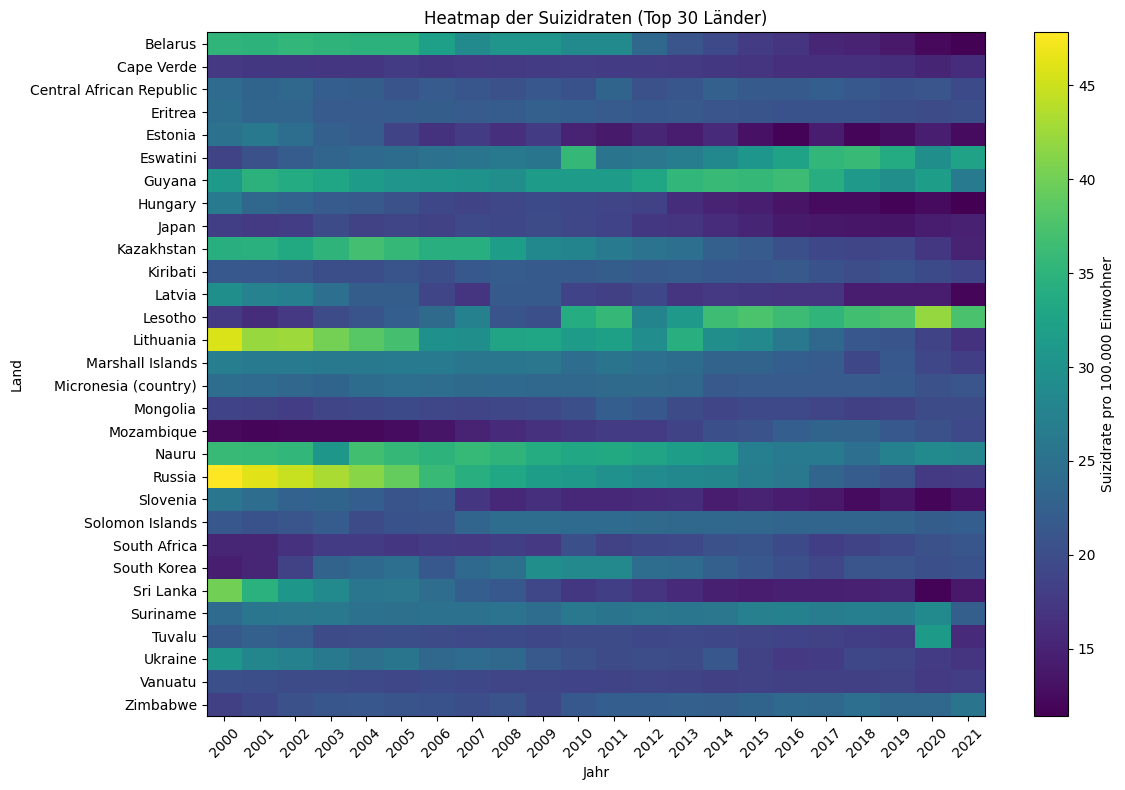

In [75]:

# 7. HEATMAP: LÄNDER (Y) x JAHRE (X) – TOP 30 LÄNDER

# TOP-30 Länder in "countries_subset" schreiben
countries_subset = (
    data.groupby("Entity")[rate_col]
    .mean()
    .sort_values(ascending=False)
    .head(30)
    .index
)

heat_data = data[data["Entity"].isin(countries_subset)]

pivot = heat_data.pivot(index="Entity", columns="Year", values=rate_col)

plt.figure(figsize=(12, 8))
plt.imshow(pivot, aspect="auto")
plt.colorbar(label="Suizidrate pro 100.000 Einwohner")
plt.title("Heatmap der Suizidraten (Top 30 Länder)")
plt.xlabel("Jahr")
plt.ylabel("Land")
plt.yticks(ticks=np.arange(len(pivot.index)), labels=pivot.index)
plt.xticks(ticks=np.arange(len(pivot.columns)), labels=pivot.columns, rotation=45)
plt.tight_layout()
plt.show()


### Interpretation: Heatmap der Suizidraten (Top 30 Länder)

Die Heatmap visualisiert die zeitliche Entwicklung der altersstandardisierten Suizidraten für die 30 Länder mit den höchsten durchschnittlichen Werten über den gesamten Beobachtungszeitraum. Die Farbkodierung erlaubt eine gleichzeitige Betrachtung von **länderspezifischer Stabilität** und **globalen zeitlichen Mustern**.

**Zentrale Beobachtungen:**

- **Vertikale Muster** weisen auf Länder hin, die über viele Jahre hinweg konstant hohe Suizidraten aufweisen, was auf tief verankerte strukturelle oder gesellschaftliche Belastungsfaktoren hindeutet.
- **Horizontale Muster** deuten auf Zeiträume hin, in denen sich Suizidraten in mehreren Ländern parallel verändern, was mit globalen Entwicklungen wie wirtschaftlichen Krisen, politischen Umbrüchen oder Änderungen in Präventionsstrategien in Zusammenhang stehen kann.
- **Abrupte Farbwechsel innerhalb einzelner Länder** machen kurzfristige Brüche sichtbar, die auf nationale Reformen, Krisenereignisse oder Veränderungen in der Datenerfassung hinweisen könnten.

Insgesamt verdeutlicht die Heatmap, dass hohe Suizidraten in vielen Ländern kein kurzfristiges Phänomen sind, sondern häufig über längere Zeiträume persistieren, während globale Trends sich länderspezifisch unterschiedlich ausprägen.

---

### 4.8 Ländervergleich der Suizidraten im zeitlichen Verlauf

Im folgenden Abschnitt wird ein vergleichender Blick auf ausgewählte Länder geworfen. Die Darstellung erlaubt es, die durchschnittliche weltweite Entwicklung auf ihre länderspezifischen Ausprägungen herunterzubrechen und Unterschiede im zeitlichen Verlauf sichtbar zu machen.

Die Länder Deutschland, Vereinigte Staaten, Japan und Zimbabwe wurden bewusst ausgewählt, da sie unterschiedliche geografische Regionen, sozioökonomische Rahmenbedingungen und Gesundheitssysteme repräsentieren. Dadurch können kontrastreiche Entwicklungen verglichen und exemplarisch verdeutlicht werden, dass globale Trends nicht zwangsläufig für alle Länder in gleicher Weise gelten.


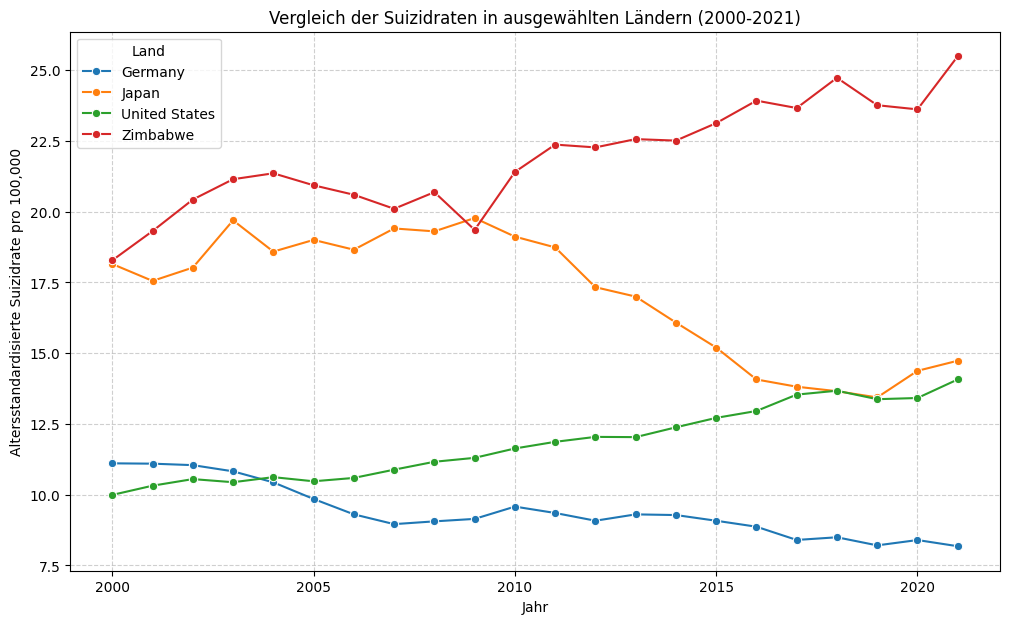

In [93]:
# Ersetzen der Platzhalterländer durch Vergleichsländer
selected_countries = ['Germany', 'United States', 'Japan', 'Zimbabwe']

# Daten filtern, um nur die ausgewählten Länder zu behalten
country_comparison = data[data['Entity'].isin(selected_countries)]

# Visualisierung mit Seaborn lineplot, wobei die Farbe nach Land unterscheidet
plt.figure(figsize=(12, 7))
sns.lineplot(data=country_comparison, x='Year', y='SuicideRate', hue='Entity', marker='o')

# Achsen und Titel beschriften (Wichtig für die volle Punktzahl!)
plt.title('Vergleich der Suizidraten in ausgewählten Ländern (2000-2021)')
plt.xlabel('Jahr')
plt.ylabel('Altersstandardisierte Suizidrate pro 100,000')
plt.legend(title='Land')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Interpretation: Vergleich ausgewählter Länder (2000–2021)

Das Liniendiagramm zeigt die **zeitliche Entwicklung der altersstandardisierten Suizidraten** für vier ausgewählte Länder im Zeitraum von 2000 bis 2021:

- X-Achse: Jahre  
- Y-Achse: altersstandardisierte Suizidrate  
- Farbe: jeweiliges Land  

**Was man erkennen kann:**

- Die Länder weisen **deutlich unterschiedliche Ausgangsniveaus** und Entwicklungsverläufe auf, was auf strukturelle und gesellschaftliche Unterschiede hindeutet.
- Während einige Länder über den gesamten Zeitraum einen **rückläufigen Trend** zeigen, sind in anderen Ländern **stärkere Schwankungen** oder zeitweise Anstiege erkennbar.
- **Unterschiedliche Steigungen der Kurven** verdeutlichen, dass sich Suizidraten nicht weltweit parallel entwickeln, sondern länderspezifisch auf politische Maßnahmen, wirtschaftliche Bedingungen oder kulturelle Faktoren reagieren.

Der Ländervergleich macht sichtbar, dass globale Trends nicht auf alle Staaten gleichermaßen zutreffen und unterstreicht die Bedeutung nationaler Kontextfaktoren für die Entwicklung von Suizidraten.

#### Länderbezogene Einordnung der Ergebnisse

Der globale Abwärtstrend der durchschnittlichen Suizidraten verdeckt erhebliche Unterschiede zwischen einzelnen Ländern. Der Vergleich ausgewählter Staaten zeigt, dass Länder wie Deutschland und Japan über den betrachteten Zeitraum tendenziell sinkende Suizidraten aufweisen, was unter anderem mit einem gut ausgebauten Gesundheitssystem, präventiven Maßnahmen sowie einer zunehmenden gesellschaftlichen Thematisierung psychischer Erkrankungen in Verbindung gebracht werden kann. 

Die Vereinigten Staaten zeigen hingegen stärkere Schwankungen, was auf heterogene sozioökonomische Bedingungen, regionale Unterschiede sowie zeitlich begrenzte Krisen hindeuten könnte. Zimbabwe weist im Vergleich dazu niedrigere oder instabilere Werte auf, die jedoch vorsichtig interpretiert werden müssen, da eingeschränkte Datenerfassung, kulturelle Tabuisierung und unvollständige Meldesysteme zu einer systematischen Untererfassung führen können. 

Insgesamt verdeutlicht der länderbezogene Vergleich, dass der globale Durchschnitt zwar einen allgemeinen Trend abbildet, die zugrunde liegenden Entwicklungen jedoch stark von nationalen politischen, wirtschaftlichen und gesellschaftlichen Rahmenbedingungen abhängig sind.


---

## 5. Wissenschaftliche Diskussion und Schlussfolgerung

Die Ergebnisse der vorliegenden Analyse zeigen einen **klaren globalen Abwärtstrend der altersstandardisierten Suizidraten** im Zeitraum von 2000 bis 2021. Diese Entwicklung steht im Einklang mit internationalen Berichten, insbesondere der Weltgesundheitsorganisation (WHO), die den Rückgang unter anderem auf Fortschritte in der Gesundheitsversorgung, verbesserte psychiatrische Angebote, verstärkte Aufklärung sowie präventive Maßnahmen auf struktureller Ebene zurückführen. Dennoch verläuft dieser Rückgang nicht gleichmäßig, sondern weist erhebliche Unterschiede zwischen einzelnen Ländern auf.

Ein zentrales Ergebnis ist die **Persistenz signifikanter internationaler Ungleichheiten**. Während einige Länder dauerhaft niedrige Suizidraten aufweisen – häufig begünstigt durch stabile soziale Strukturen, starke familiäre Netzwerke, kulturelle oder religiöse Normen sowie eine eingeschränkte Verfügbarkeit hoch letaler Methoden – bleiben andere Länder über den gesamten Beobachtungszeitraum hinweg stark belastet. In der Literatur werden hohe Suizidraten häufig mit politischer Instabilität, wirtschaftlicher Unsicherheit, Arbeitslosigkeit, Alkohol- oder Substanzmissbrauch sowie einer unzureichenden psychiatrischen Versorgung in Verbindung gebracht. Die Analyse legt nahe, dass insbesondere in solchen Kontexten bereits geringe gesellschaftliche Veränderungen deutliche Auswirkungen auf die Suizidraten haben können.

Die Untersuchung macht zudem deutlich, dass **niedrige gemessene Suizidraten nicht zwangsläufig eine geringe tatsächliche Suizidbelastung widerspiegeln**. Studien weisen darauf hin, dass in Ländern mit starker gesellschaftlicher Tabuisierung, religiösen Verboten oder schwach ausgeprägten Meldesystemen Todesfälle häufig als Unfälle oder unklare Ursachen klassifiziert werden. Dies führt zu einer systematischen Untererfassung. Umgekehrt können Länder mit gut funktionierenden Todesursachenregistern höhere offizielle Suizidraten ausweisen, ohne dass die tatsächliche Belastung zwingend größer ist. Die Qualität der Datenerfassung spielt somit eine zentrale Rolle für die Interpretation internationaler Vergleiche.

Die Analyse der Extremwerte zeigt, dass sowohl die höchsten als auch die niedrigsten Suizidraten im Zeitverlauf tendenziell abnehmen, die **Spannweite zwischen Ländern jedoch weiterhin groß bleibt**. Dies deutet darauf hin, dass globale Fortschritte zwar erzielt wurden, diese jedoch nicht ausreichen, um strukturelle Ungleichheiten nachhaltig zu reduzieren. Vielmehr bleibt die Entwicklung stark von gesellschaftlichen Ressourcen, staatlicher Stabilität, kulturellen Normen sowie der Qualität der Präventions- und Meldesysteme abhängig.

Insgesamt bestätigt die Analyse zentrale Aussagen der internationalen Fachliteratur: **Globale Suizidprävention zeigt Wirkung**, Suizidalität bleibt jedoch ein **komplexes, multidimensionales Phänomen**, das nicht allein durch medizinische Maßnahmen adressiert werden kann. Nachhaltige Verbesserungen erfordern unter anderem Investitionen in psychiatrische Versorgung und Gesundheitsinfrastruktur, eine gesellschaftliche Enttabuisierung psychischer Erkrankungen, wirtschaftliche Stabilität, die Regulierung hochletaler Suizidmethoden sowie den Ausbau verlässlicher Meldesysteme für Todesursachen. Eine wirksame globale Strategie muss daher sowohl regionale Unterschiede berücksichtigen als auch gesellschaftliche, ökonomische und kulturelle Faktoren systematisch in die Präventionsarbeit einbeziehen.

---
